In [1]:
__author__ = '@Tssp'

''' RNN Bidireccional en Keras '''

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates
from utils.NNutils import *

Using TensorFlow backend.


In [2]:
mdnRnA = np.loadtxt('../../mdnRnA.txt', delimiter=',')
startday = pd.datetime(2013, 7, 1)
dates = pd.date_range(startday, periods=len(mdnRnA), freq='W')
test_size=int(0.3 * len(mdnRnA))
PMP = pd.read_csv('../Data/Daily/NVR/NVR_weekly.csv')

In [3]:
mdnRnA_val = np.loadtxt('../../mdnRnA_validation.txt')
aemet = pd.read_csv('../Data/val_weekly.csv', skiprows=2, names=['dates', 'tmed'])
startdat_val = dates[-1]

In [4]:
DF = aemet
DF['mdnRnA'] = mdnRnA_val
DF

,dates,tmed,mdnRnA
0,2019-07-28,24.671429,102.0
1,2019-08-04,21.828571,94.0
2,2019-08-11,24.585714,103.0
3,2019-08-18,20.900000,113.5
4,2019-08-25,21.414286,73.0
5,2019-09-01,23.957143,81.0
6,2019-09-08,17.442857,109.0
7,2019-09-15,18.857143,109.0
8,2019-09-22,21.514286,90.0


In [5]:
sample_size = 4

In [6]:
mdnRnA_val = np.loadtxt('../../mdnRnA_validation.txt')
aemet = pd.read_csv('../Data/val_weekly.csv', skiprows=2, names=['dates', 'tmed'])
DF_val = aemet
DF_val['mdnRnA'] = mdnRnA_val
scaled_val = MinMaxScaler().fit(DF_val[['tmed', 'mdnRnA']].values).transform(DF_val[['tmed', 'mdnRnA']].values)
DF_scaled_val = pd.DataFrame(scaled_val, columns=['tmed', 'mdnRnA'])
DF_scaled_val['dates'] = DF_val['dates']
X = data_toCNN_format([DF_scaled_val], ['val'], ['mdnRnA', 'tmed'], 4)['val']

In [7]:
model = load_model('modelaemet.h5')

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


In [8]:
pred_val = model.predict(X)
startday_val = pd.datetime(2019, 7, 28)

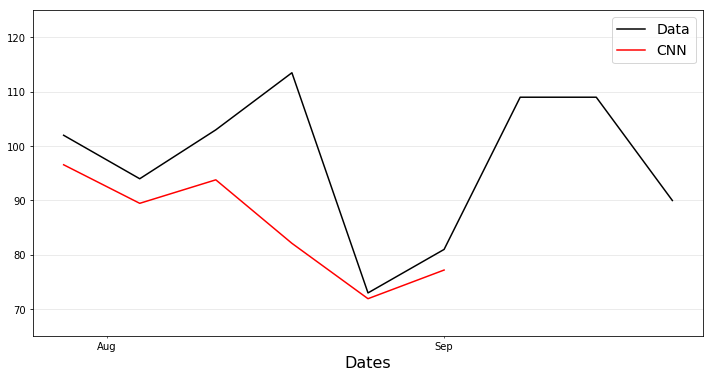

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
xaxis = ax.get_xaxis()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))
plt.plot(pd.date_range(startday_val, periods=len(mdnRnA_val), freq='W'), DF_val['mdnRnA'].values, 'k')
#plt.plot(pred_val)
plt.plot(pd.date_range(startday_val, periods=len(pred_val), freq='W'), pred_val, 'r')
plt.legend(['Data', 'CNN'], fontsize=14)
plt.xlabel('Dates', fontsize=16)
plt.ylim([65, 125])
plt.grid(alpha=0.3)